In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('electric_fence_dataset.csv')

In [3]:
df

,Load,RMS_Current,Peak_Current,Frequency,Pulse_Count
0,Fan,3.79,5.00,48.91,2
1,Fan,3.88,6.44,51.12,1
2,Fan,3.74,6.37,49.57,2
3,Fan,3.51,5.27,48.98,0
4,Fan,2.59,8.17,48.73,2
...,...,...,...,...,...
295,Fence,6.85,40.41,50.78,8
296,Fence,14.90,26.74,59.25,12
297,Fence,9.99,37.21,52.70,9
298,Fence,6.93,42.85,54.17,9


In [4]:
fence_data = df[df['Load'] == 'Fence']
fence_data.describe()

,RMS_Current,Peak_Current,Frequency,Pulse_Count
count,50.000000,50.000000,50.00000,50.000000
mean,9.812200,33.622400,54.80880,10.880000
std,2.933155,8.208885,2.81194,2.036804
min,5.220000,20.460000,50.15000,8.000000
25%,7.510000,27.280000,52.92500,9.000000
50%,9.610000,32.695000,54.44000,11.000000
75%,12.447500,40.167500,56.91750,12.000000
max,14.900000,49.900000,59.99000,14.000000


In [5]:
normal_data = df[df['Load'] != 'Fence']
print(normal_data.describe())

       RMS_Current  Peak_Current   Frequency  Pulse_Count
count   250.000000    250.000000  250.000000   250.000000
mean      2.971600      6.710320   50.032120     1.016000
std       1.121181      1.997257    1.104477     0.821244
min       1.060000      3.020000   48.020000     0.000000
25%       2.092500      5.062500   49.145000     0.000000
50%       2.935000      6.640000   50.045000     1.000000
75%       3.930000      8.485000   51.045000     2.000000
max       4.980000      9.970000   51.960000     2.000000


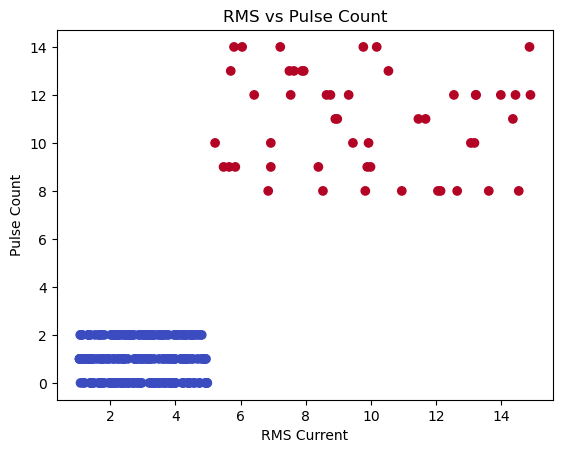

In [6]:
plt.scatter(df['RMS_Current'], df['Pulse_Count'], c=(df['Load'] == 'Fence'), cmap='coolwarm')
plt.xlabel('RMS Current')
plt.ylabel('Pulse Count')
plt.title('RMS vs Pulse Count')
plt.show()

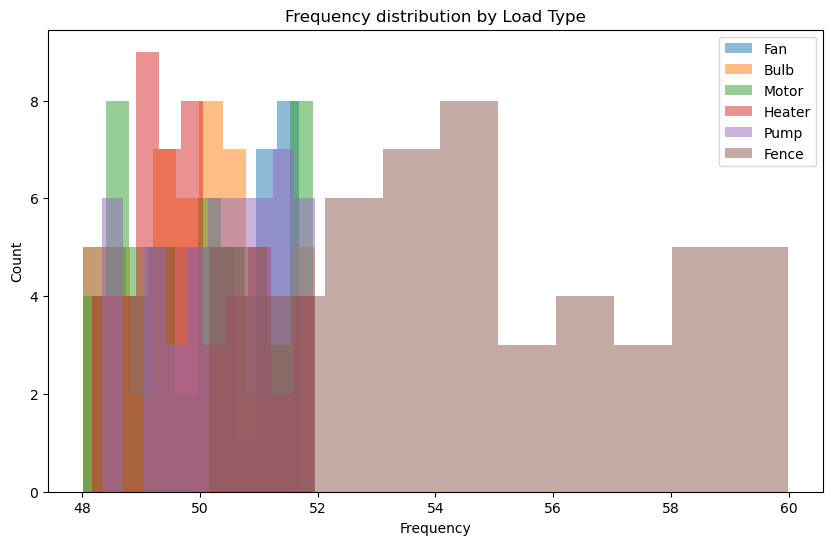

In [7]:
plt.figure(figsize=(10,6))
for load in df['Load'].unique():
    subset = df[df['Load'] == load]
    plt.hist(subset['Frequency'], bins=10, alpha=0.5, label=load)

plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Frequency distribution by Load Type')
plt.legend()
plt.show()

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
features = ['RMS_Current','Peak_Current','Frequency','Pulse_Count']
df[features] = scaler.fit_transform(df[features])
print(df.head())

  Load  RMS_Current  Peak_Current  Frequency  Pulse_Count
0  Fan     0.197254      0.042235   0.074353     0.142857
1  Fan     0.203757      0.072952   0.258981     0.071429
2  Fan     0.193642      0.071459   0.129490     0.142857
3  Fan     0.177023      0.047995   0.080201     0.000000
4  Fan     0.110549      0.109855   0.059315     0.142857


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df[['RMS_Current','Peak_Current','Frequency','Pulse_Count']]
y = df['Load'].apply(lambda x: 1 if x == 'Fence' else 0)

In [12]:
X

,RMS_Current,Peak_Current,Frequency,Pulse_Count
0,0.197254,0.042235,0.074353,0.142857
1,0.203757,0.072952,0.258981,0.071429
2,0.193642,0.071459,0.129490,0.142857
3,0.177023,0.047995,0.080201,0.000000
4,0.110549,0.109855,0.059315,0.142857
...,...,...,...,...
295,0.418353,0.797568,0.230576,0.571429
296,1.000000,0.505973,0.938179,0.857143
297,0.645231,0.729309,0.390977,0.642857
298,0.424133,0.849616,0.513784,0.642857


In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
295    1
296    1
297    1
298    1
299    1
Name: Load, Length: 300, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [16]:
model = RandomForestClassifier()

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
y_pred = model.predict(X_test)

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00         8

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [20]:
fence_data = df[df['Load'] == 'Fence']

In [21]:
normal_data = df[df['Load'] != 'Fence']

In [22]:
print("Fence Data Statistics:")
print(fence_data[['RMS_Current','Peak_Current','Pulse_Count']].describe())

Fence Data Statistics:
       RMS_Current  Peak_Current  Pulse_Count
count    50.000000     50.000000    50.000000
mean      0.632384      0.652782     0.777143
std       0.211933      0.175104     0.145486
min       0.300578      0.372014     0.571429
25%       0.466040      0.517491     0.642857
50%       0.617775      0.632999     0.785714
75%       0.822796      0.792395     0.857143
max       1.000000      1.000000     1.000000


In [23]:
print("\n Normal Load Data Statistics:")
print(normal_data[['RMS_Current','Peak_Current','Pulse_Count']].describe())


 Normal Load Data Statistics:
       RMS_Current  Peak_Current  Pulse_Count
count   250.000000    250.000000   250.000000
mean      0.138121      0.078718     0.072571
std       0.081010      0.042604     0.058660
min       0.000000      0.000000     0.000000
25%       0.074603      0.043569     0.000000
50%       0.135477      0.077218     0.071429
75%       0.207370      0.116574     0.142857
max       0.283237      0.148251     0.142857


In [24]:
import joblib
joblib.dump(model, "fence_model.pkl")

['fence_model.pkl']

In [25]:
model = joblib.load("fence_model.pkl")

In [31]:
live_features = pd.DataFrame([[0.56, 0.72, 0.33, 0.85]], columns=['RMS_Current', 'Peak_Current', 'Frequency', 'Pulse_Count'])

pred = model.predict(live_features)
)  # scaled values
pred = model.predict(live_features)

SyntaxError: unmatched ')' (1170824487.py, line 5)

In [29]:
if pred[0] == 1:
    print(" Fence load detected / suspicious")
else:
    print(" Normal load")

 Fence load detected / suspicious
